In [1]:
import pandas as pd

In [4]:
dataset = pd.read_csv('../ecommerce_banner_promo.csv')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,6/3/2016 3:36,0


In [5]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


(1000, 10)

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [7]:
dataset.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


In [8]:
dataset.groupby('Clicked on Ad').size()

Clicked on Ad
0    500
1    500
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

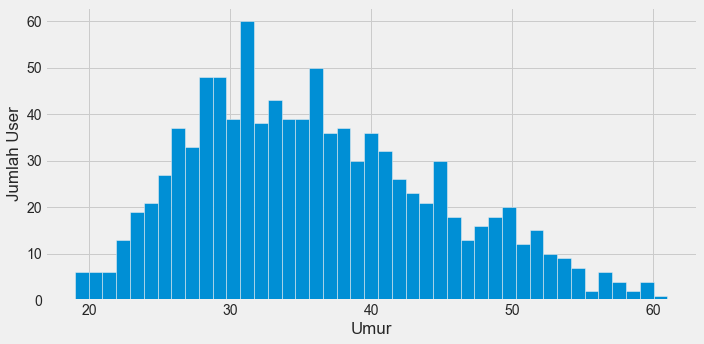

In [11]:
plt.figure(figsize=(10,5))
plt.hist(dataset['Age'], bins=dataset['Age'].nunique())
plt.xlabel('Umur')
plt.ylabel('Jumlah User')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

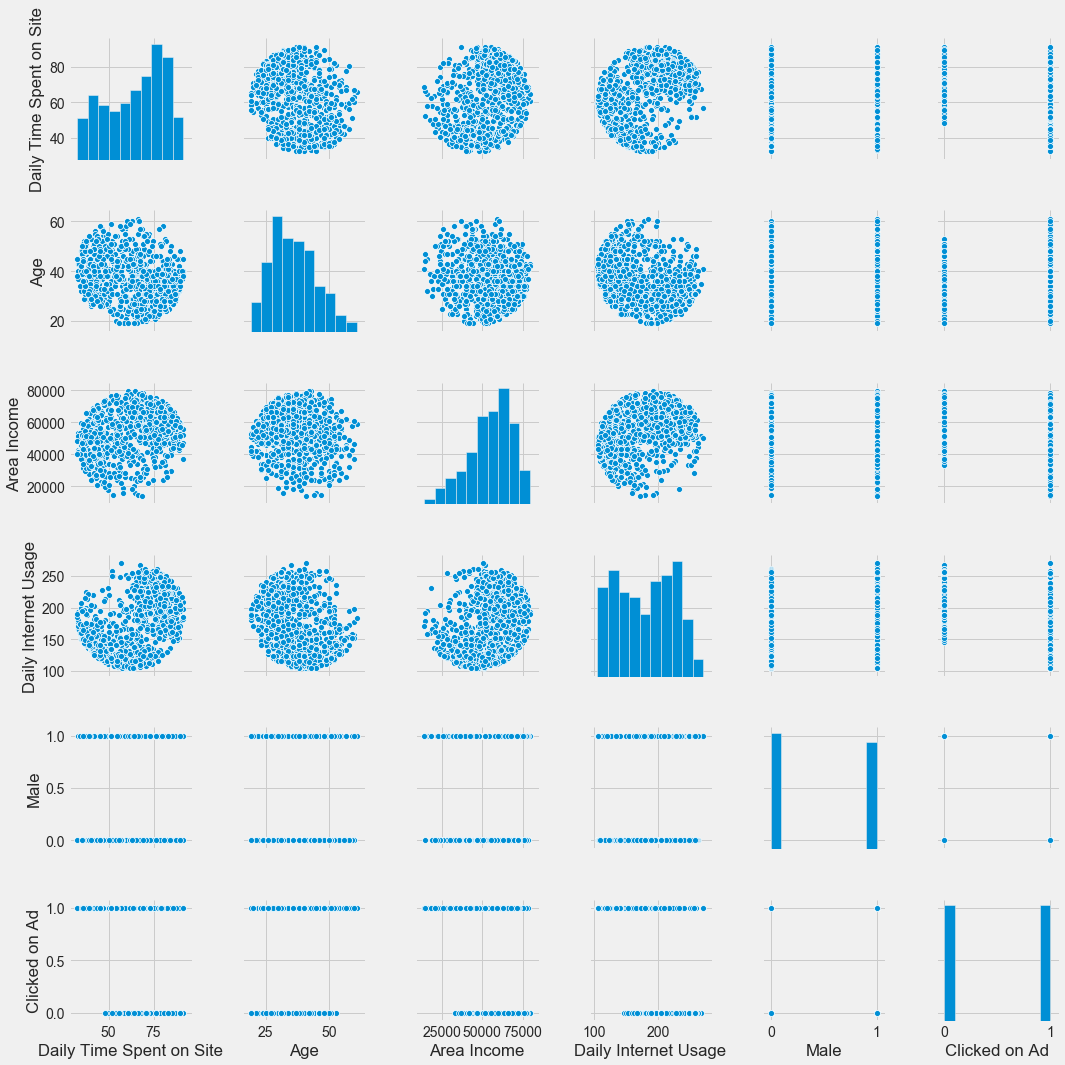

In [12]:
plt.figure()
sns.pairplot(dataset)
plt.show()

In [13]:
dataset.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [16]:
X = dataset.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'], axis=1)
y = dataset['Clicked on Ad']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [18]:
logreg = LogisticRegression(solver='lbfgs')

In [19]:
logreg = logreg.fit(X_train, y_train)

In [20]:
y_pred = logreg.predict(X_test)

In [21]:
print("Model Performance Evaluation")
print("Train Accuracy:", logreg.score(X_train, y_train))
print("Test Accuracy:", logreg.score(X_test, y_test))

Model Performance Evaluation
Train Accuracy: 0.9
Test Accuracy: 0.9


In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[85  4]
 [16 95]]


In [24]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

   micro avg       0.90      0.90      0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200

